***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.dates as dates

from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_style('white')
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Load the Data, set index and info about data</b>
</div>

In [2]:
df = pd.read_csv('POPTHM.csv')
df.rename(columns = {'POPTHM': 'value', 'DATE': 'date'}, inplace = True)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
#df['date'] = df['date'].dt.strftime('%d/%m/%Y')
df.set_index('date', inplace = True)
df.sort_index(inplace = True)
df.tail()

,value
date,
2019-09-01,328897.0
2019-10-01,329054.0
2019-11-01,329191.0
2019-12-01,329314.0
2020-01-01,329423.0


<div class="alert alert-block alert-info">
<b>Plot original time series</b>
</div>

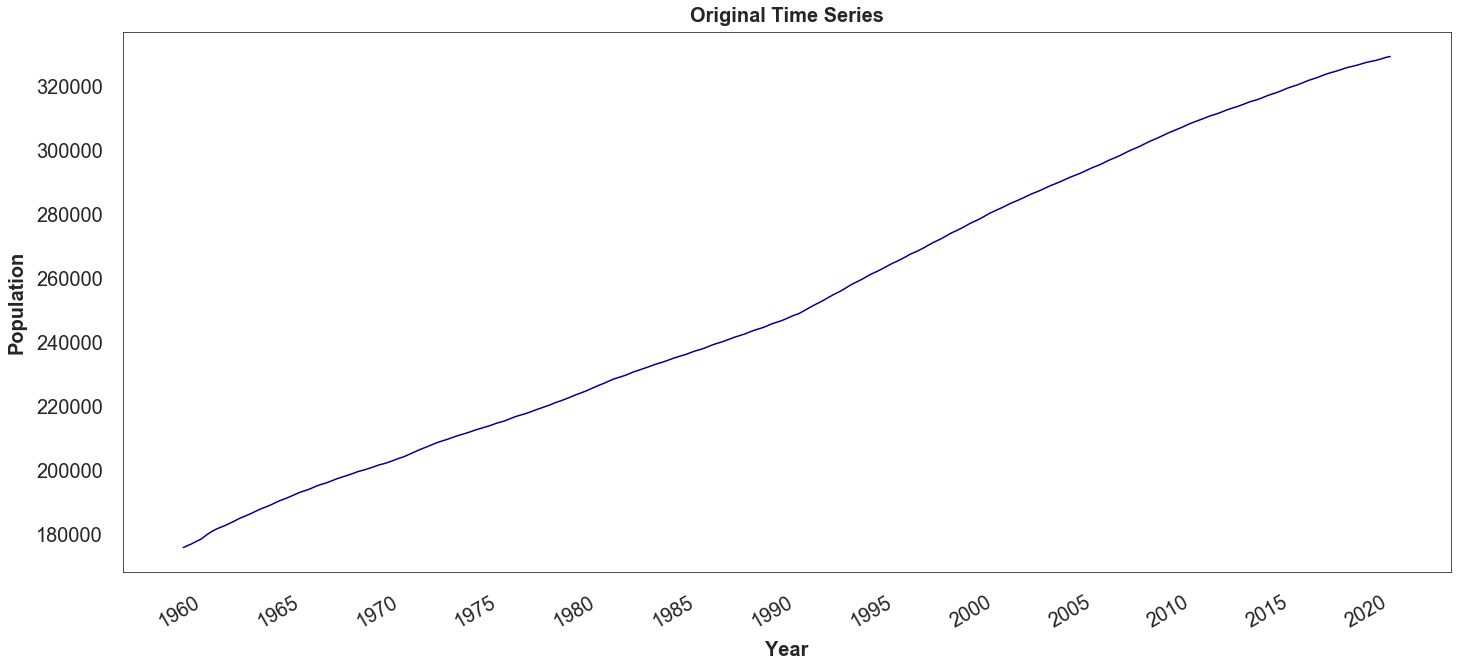

In [3]:
plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Original Time Series', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                
plt.tight_layout()                                               
plt.rc('font', size = 10)
plt.plot(df.index, df['value'], color = 'darkblue')
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5)) 
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

Type the year you want to plot from 1959 to 2019: 1970


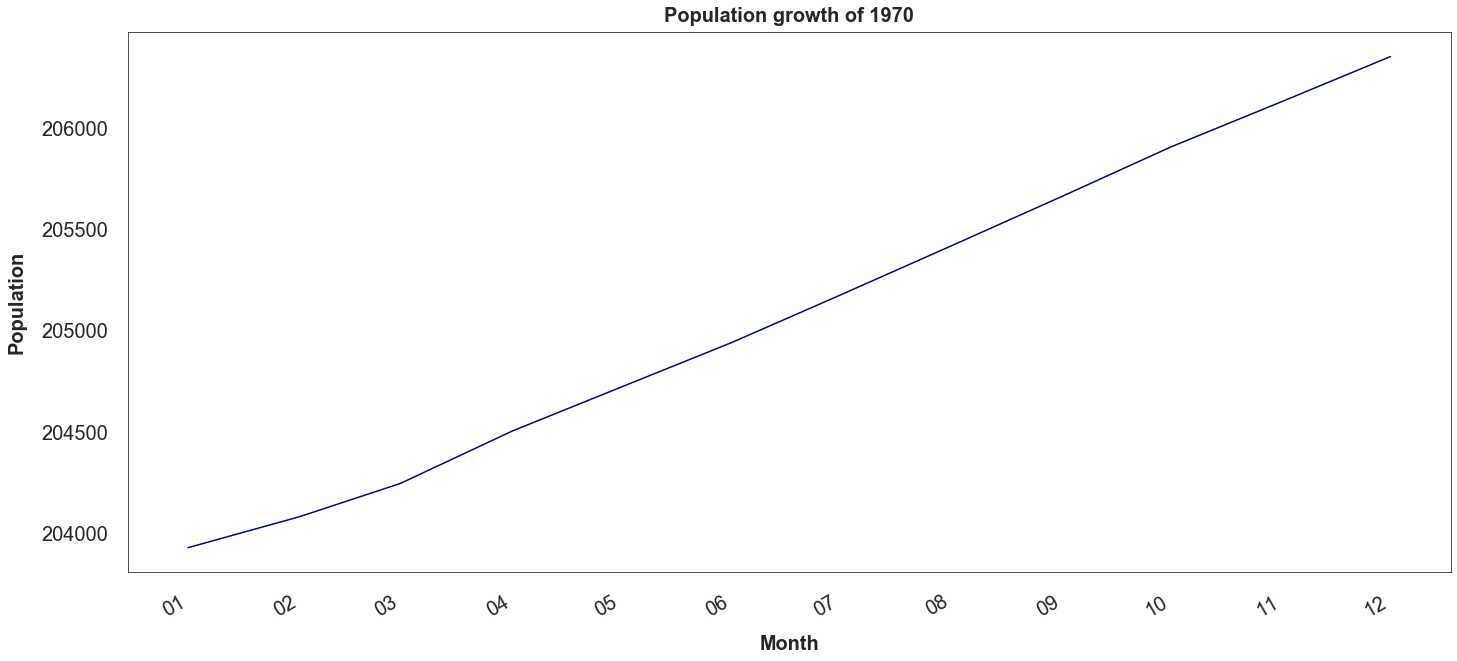

In [4]:
year = int(input('Type the year you want to plot from 1959 to 2019: '))
if year > 1958 and year < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth of %.0f' % year, weight = 'bold', fontsize = 20, pad = 10)
    plt.xlabel('Month', weight = 'bold', fontsize = 20, labelpad = 15)
    plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)                                
    plt.tight_layout()                                               
    plt.rc('font', size = 10)                                                                                      
    dfyear1 = df[df.index.year == year]
    plt.plot(dfyear1, color = 'darkblue')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%m')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval =1)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()
else:
    print('Run again and type a valid year')

<div class="alert alert-block alert-info">
<b>Pick multiple years to plot</b>
</div>

Type the year you wanna start from 1959 to 2018: 1990
Type the year you wanna stop from 1960 to 2019: 2015


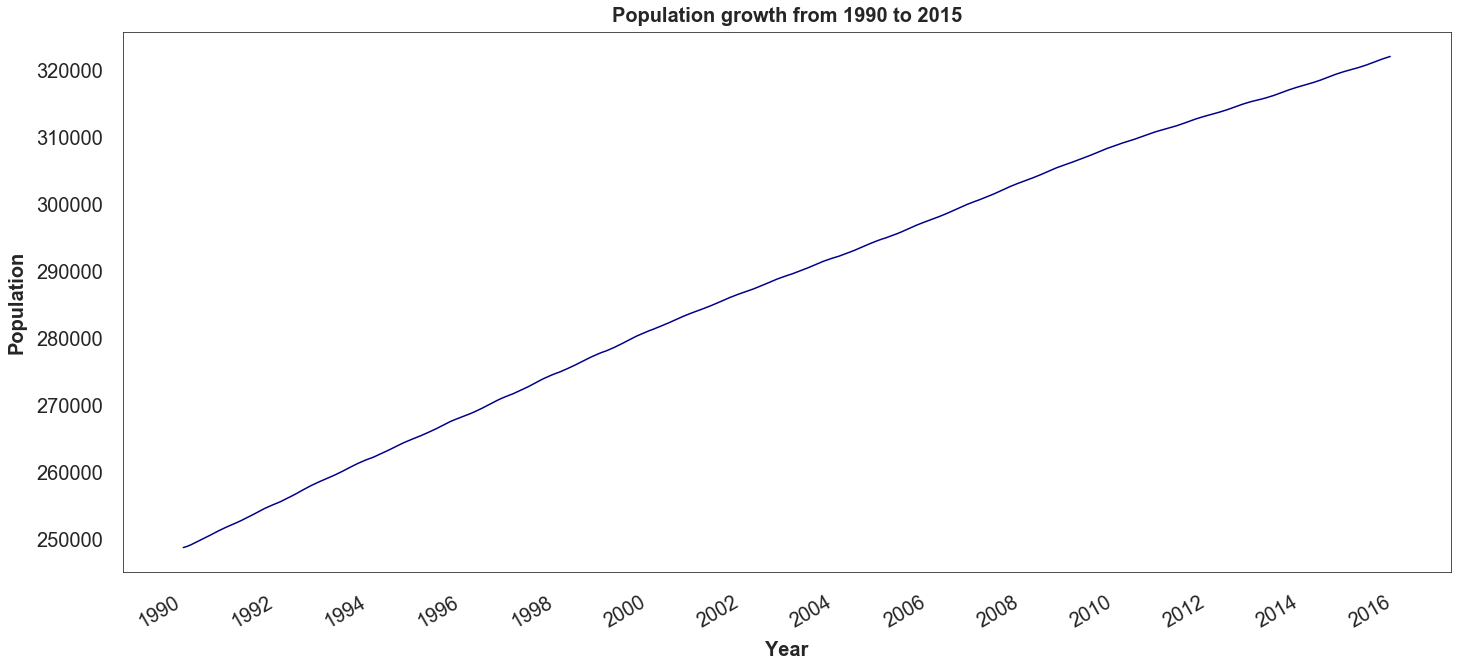

In [5]:
year_s = int(input('Type the year you wanna start from 1959 to 2018: '))
year_p = int(input('Type the year you wanna stop from 1960 to 2019: '))
if year_s > 1958 and year_s < year_p and year_p > year_s and year_p < 2020:
    plt.figure(figsize = (20,10))
    plt.rc('font', weight = 'normal')
    plt.title('Population growth from %.0f to %.0d' % (year_s, year_p), weight = 'bold', fontsize = 20, pad = 10)
    plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
    plt.tight_layout()                                               
    plt.rc('font', size = 10)
    dfyear2 = df[(df.index.year >= year_s) & (df.index.year <= year_p)]
    plt.plot(dfyear2, color = 'darkblue')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%Y')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()
else:
    print('Run again and type a valid year(s)')

<div class="alert alert-block alert-info">
<b>Create percentage change time series</b>
</div>

In [6]:
#####################################################################################
#                                                                                   #
#  Use this to get first difference -> diff = df['value'].diff()                    #
#                                                                                   #
#  Use this to get percentage change use -> pct = df['value'].pct_change()          #    
#                                                                                   #
#  Use this to get only numerical value -> ._get_numeric_data()                     #
#                                                                                   #
#  Use this to get only assign value inside a column or row -> .dropna()            #
#                                                                                   #
#####################################################################################

pct = df['value'].pct_change()
pct_fix = pct._get_numeric_data().dropna()

<div class="alert alert-block alert-info">
<b>Fit curve to histogram</b>
</div>

Skewness: 1.172188
Kurtosis: 4.202245


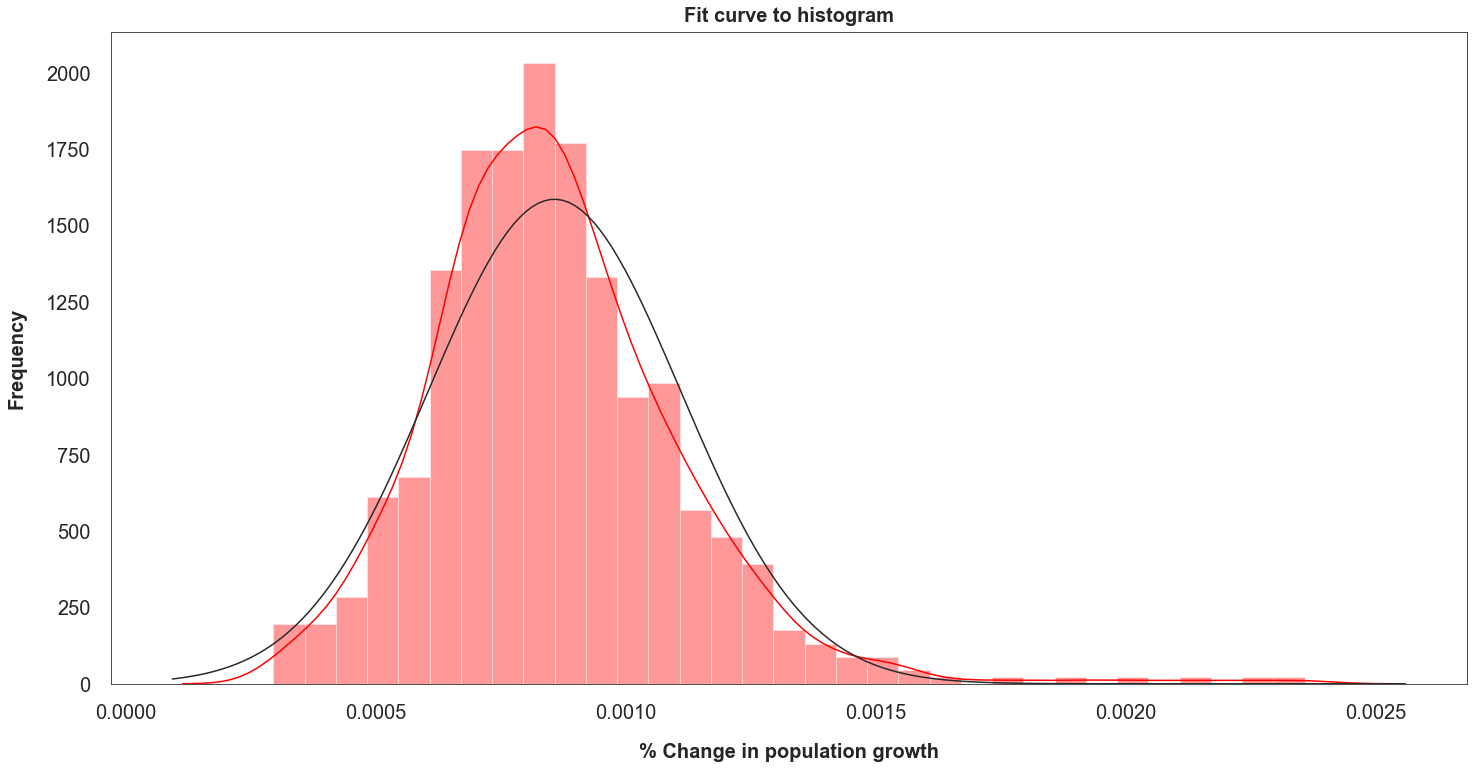

In [108]:
print('Skewness: %f' % skew(pct_fix)) 
print('Kurtosis: %f' % kurtosis(pct_fix))

plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 10)
ax = sns.distplot(pct_fix, fit = norm, color = 'red', hist = True, kde = True)
ax.set_title('Fit curve to histogram', weight = 'bold', fontsize = 20, pad = 10)
ax.set_xlabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 20)
ax.set_ylabel('Frequency', weight = 'bold', fontsize = 20, labelpad = 20)
ax.tick_params(labelsize = 20, length = 10)
start, end = plt.ylim()
plt.yticks(np.arange(start, end, 250))
plt.show() 

<div class="alert alert-block alert-info">
<b>Check if the time series of original and percentage change values are stationary</b>
</div>

In [8]:
result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Original Time Series is Non-Stationary')

ADF Statistic: 0.185761
p-value: 0.971452
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Failed to Reject Ho - Original Time Series is Non-Stationary


In [9]:
result = adfuller(pct_fix)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Percentage change Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Percentage change Time Series is Non-Stationary')

ADF Statistic: -3.523377
p-value: 0.007407
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Percentage change Time Series is Stationary


<div class="alert alert-block alert-info">
<b>Decomposition of percentage change time series</b>
</div>

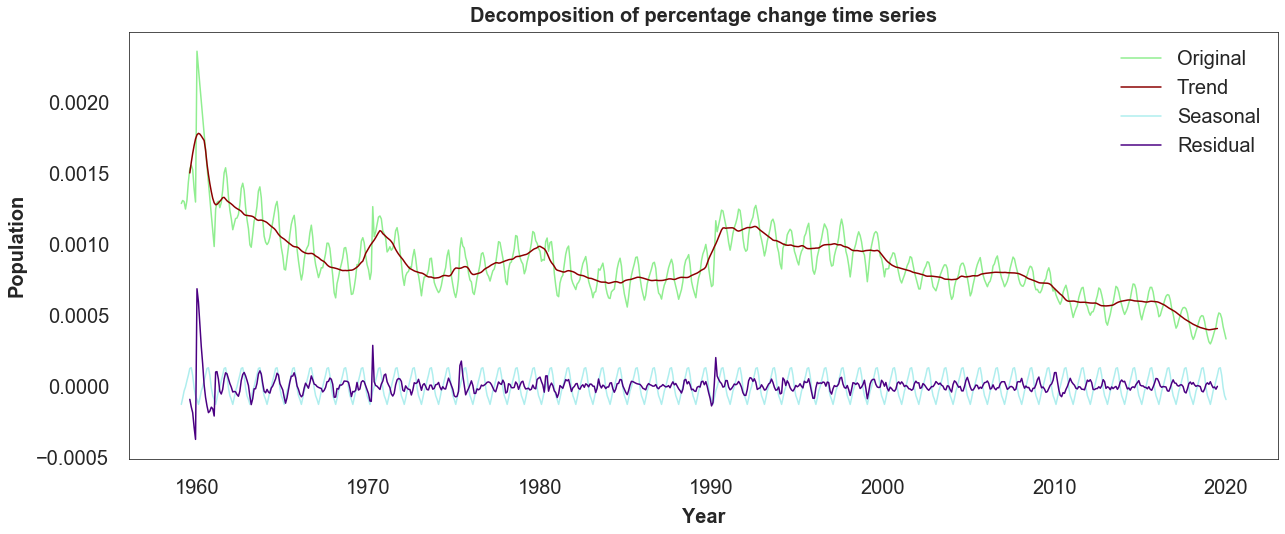

In [10]:
# Decomposition of percentage change time series
decomposition = seasonal_decompose(pct_fix)
# Trend of percentage change time series
trend = decomposition.trend
# Seasonal of percentage change time series
seasonal = decomposition.seasonal
# Residual of percentage change time series
residual = decomposition.resid

plt.figure(figsize = (20,10))
plt.title('Decomposition of percentage change time series', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout(pad = 10)                                               
plt.rc('font', size = 10)
plt.rc('font', weight = 'normal')
plt.plot(pct_fix, label = 'Original', color = 'lightgreen')
plt.plot(trend, label = 'Trend', color = 'darkred')
plt.plot(seasonal, label = 'Seasonal', color = 'paleturquoise')
plt.plot(residual, label = 'Residual', color = 'indigo')
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Plotting Autocorrelation and Parial Autocorrelation</b>
</div>

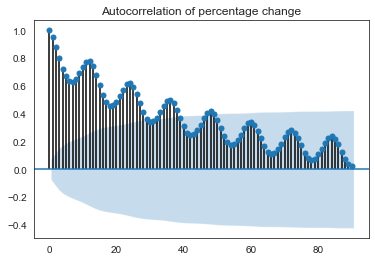

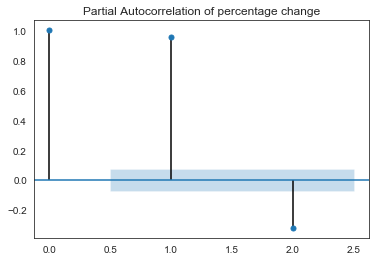

In [11]:
acf_diff = plot_acf(pct_fix, title = 'Autocorrelation of percentage change', lags = 90)

pacf_diff = plot_pacf(pct_fix,  title = 'Partial Autocorrelation of percentage change', lags = 2)

<div class="alert alert-block alert-info">
<b>Create train and test data split</b>
</div>

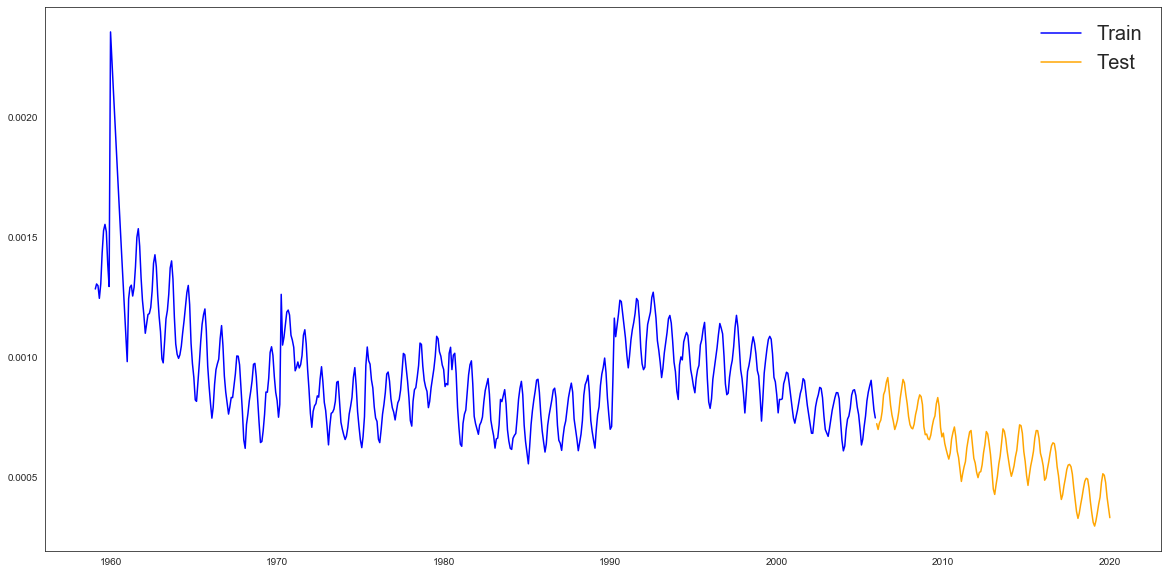

In [12]:
#############################################
#                                           #
#  Split Train = 80% and Test = 20%         #
#                                           #
#  train = pct_fix.loc['1959-01':'2005-12'] #
#  test = pct_fix.loc['2006-01':]           # 
#                                           #
#             or                            #   
#                                           # 
#  train = pct_fix['value'][0:586]          #
#  test  = pct_fix['value'][587:]           # 
#############################################

train = pct_fix.loc['1959-01':'2005-12']          
test = pct_fix.loc['2006-01':]
plt.figure(figsize = (20,10))
plt.plot(train, label = 'Train', color = 'blue')
plt.plot(test, label = 'Test', color = 'orange')
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Building the ARMA model and show model results</b>
</div>

In [13]:
######################################################
#                                                    #
#  P = Auto regressive feature of the model          #
#                                                    #
#  D = Differencing order                            #
#                                                    #
#  Q = Moving average feature of the model           #
#                                                    #
#                                                    #
######################################################

#Arima model
model = ARIMA(test.values, order = (5, 0, 1))
model_fit = model.fit()

#Fitted line
prediction = model_fit.predict()

#Forecasted values array
forecast = model_fit.forecast(11)[0]

#Confidence intervals array 
lower_conf = np.hsplit(model_fit.forecast(11)[2], 2)[0].reshape(11,1).flatten()
upper_conf = np.hsplit(model_fit.forecast(11)[2], 2)[1].reshape(11,1).flatten()

#Show Arima Results
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  169
Model:                     ARMA(5, 1)   Log Likelihood                1585.769
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 23 Dec 2020   AIC                          -3155.538
Time:                        23:21:48   BIC                          -3130.499
Sample:                             0   HQIC                         -3145.377
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      3.576      0.000       0.000       0.001
ar.L1.y        2.1869      0.059     36.999      0.000       2.071       2.303
ar.L2.y       -1.8269      0.131    -13.961      0.0

<div class="alert alert-block alert-info">
<b>Create period and Data Frame for forecast</b>
</div>

In [14]:
#You can but shouldn't create only a date period
date_forecast = pd.date_range(start = '2020-02-01', end = '2020-12-01', freq = 'MS')

df2 = pd.DataFrame()
df2['f_date'] = pd.Series(date_forecast)
df2['forecasted'] =  pd.Series(forecast)
df2.index.name = 'date'
df2.set_index('f_date', inplace = True)
df2.head()

,forecasted
f_date,
2020-02-01,0.000305
2020-03-01,0.000314
2020-04-01,0.000345
2020-05-01,0.000387
2020-06-01,0.000434


<div class="alert alert-block alert-info">
<b>Plot original and fitted line and see mean squared error</b>
</div>

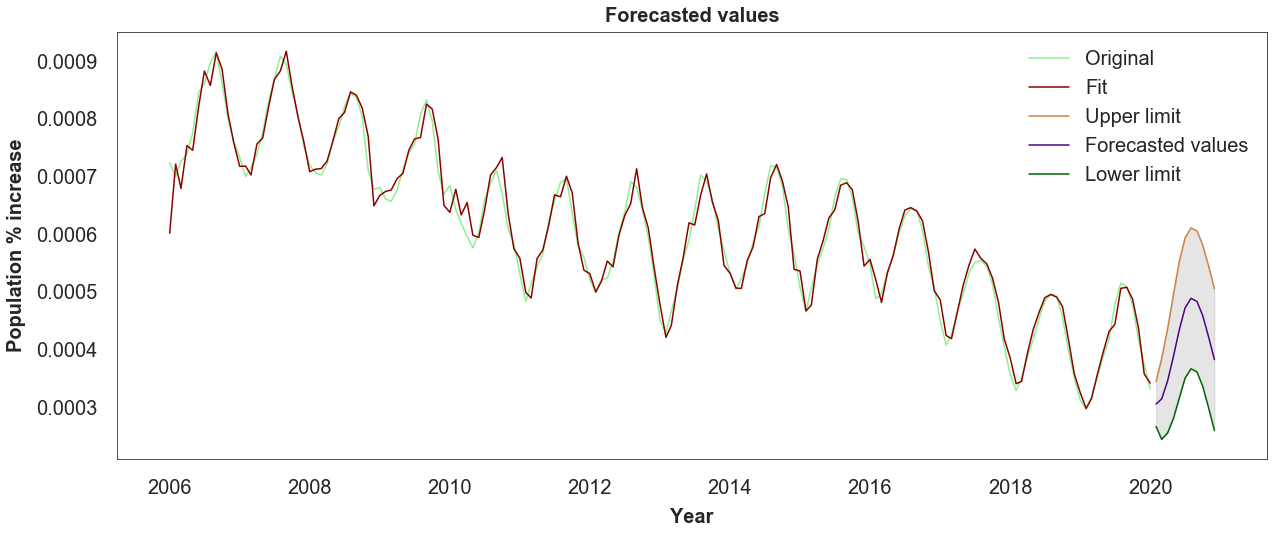

In [15]:
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Population % increase', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout(pad = 10)                                               
plt.rc('font', size = 10)
plt.rc('font', weight = 'normal')
date = pd.date_range(start = '2020-01', end = '2020-12', freq = 'M')
plt.plot(df.index[564:], test, label = 'Original', color = 'lightgreen')
plt.plot(df.index[564:], prediction, label = 'Fit', color = 'darkred')
plt.plot(df2.index, upper_conf, label = 'Upper limit', color = 'peru')
plt.plot(df2.index, forecast, label = 'Forecasted values', color = 'indigo')
plt.plot(df2.index, lower_conf, label = 'Lower limit', color = 'darkgreen')
plt.fill_between(df2.index, lower_conf, upper_conf, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Plot forecasted values</b>
</div>

Lower limit values for next 11 months is: [0.00026574 0.00024338 0.00025459 0.00027938 0.00031525 0.00034947
 0.00036585 0.00036049 0.00033546 0.0002978  0.00025879]

Forecasted values for next 11 months is: [0.00030472 0.00031364 0.00034485 0.00038677 0.00043362 0.00047121
 0.00048798 0.00048266 0.00045809 0.00042076 0.00038176]

Upper limit values for next 11 months is: [0.00034369 0.00038391 0.00043511 0.00049415 0.00055199 0.00059294
 0.00061011 0.00060482 0.00058071 0.00054371 0.00050474]


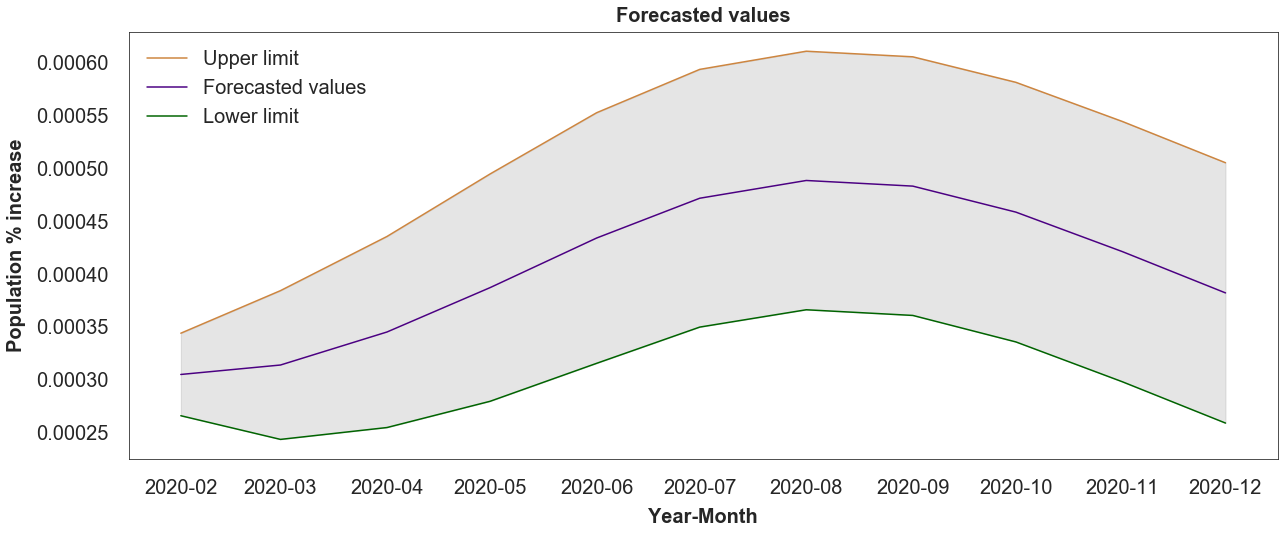

In [16]:
print('Lower limit values for next 11 months is: %s' % lower_conf)
print()
print('Forecasted values for next 11 months is: %s' % forecast)
print()
print('Upper limit values for next 11 months is: %s' % upper_conf)

plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year-Month', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Population % increase', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout(pad = 10)                                               
plt.rc('font', size = 10)
plt.rc('font', weight = 'normal')
plt.plot(date_forecast, upper_conf, label = 'Upper limit', color = 'peru')
plt.plot(date_forecast, forecast, label = 'Forecasted values', color = 'indigo')
plt.plot(date_forecast, lower_conf, label = 'Lower limit', color = 'darkgreen')
plt.fill_between(date_forecast, lower_conf, upper_conf, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left', prop = {'size':20}, frameon = False)
plt.show()